Mean digits:



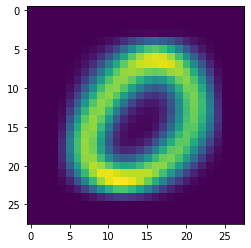

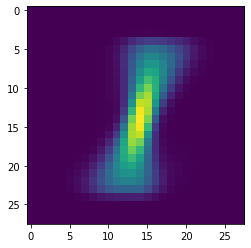

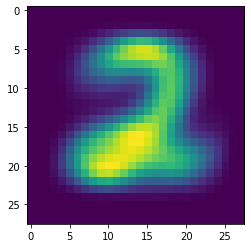

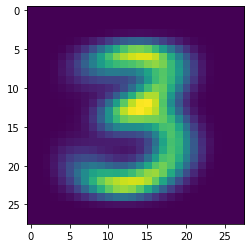

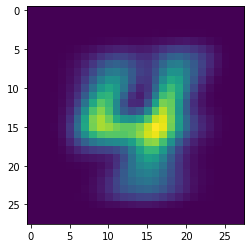

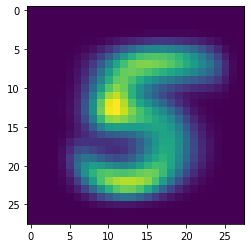

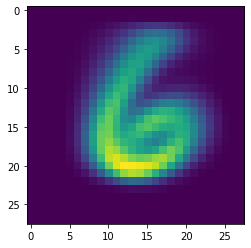

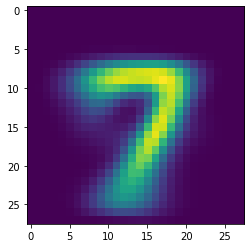

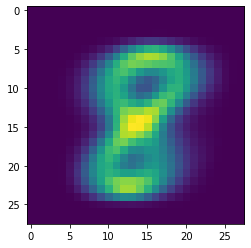

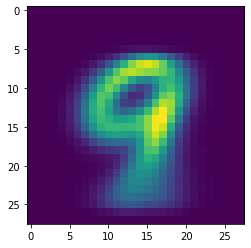

Standard deviation digits:



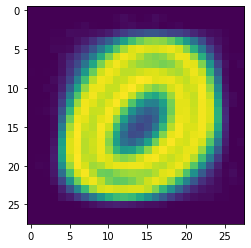

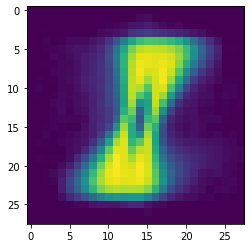

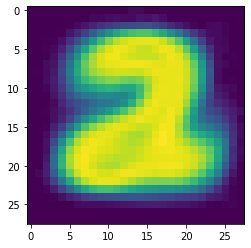

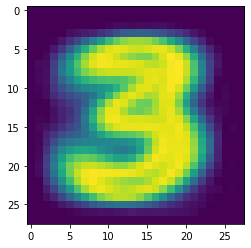

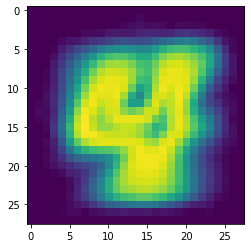

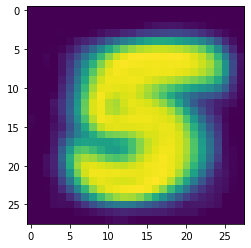

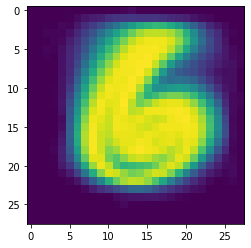

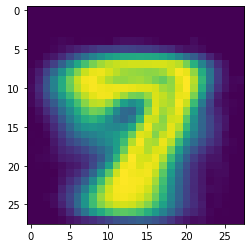

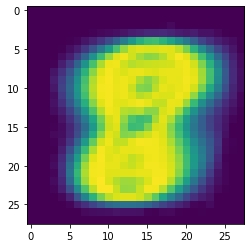

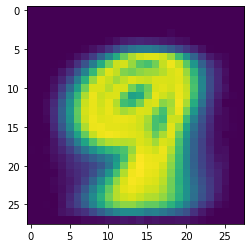

Accuracy score:  0.7809


"\nUsing 0-1 loss function and Bayesian decision rule here doesn't perform as good as many other methods on LeCun's web page\nbecause we assume Gaussian distribution when it is not always the case.\n"

In [4]:
# Lan Le - UB Person Number: 50322056
# CSE555 Problem Set 1: Bayesian Decision Theory




import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import accuracy_score
from scipy.stats import multivariate_normal as mvn



def load_mnist(path, kind='train'):

    #Load MNIST data from path
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 28, 28)

    return images, labels


def cal_mean(imgList):
    sum = np.zeros((28, 28))
    
    for img in imgList:
        sum += img

    return sum / len(imgList)


def cal_std_dev(imgList):
    mean = cal_mean(imgList)
    sum_sqr_dif = np.zeros((28, 28))
    
    for img in imgList:
        dif = img - mean
        sqr_dif = np.multiply(dif, dif)
        sum_sqr_dif += sqr_dif
    
    return np.sqrt(sum_sqr_dif/len(imgList))  
    

# read Digit MNIST dataset
base_dir = os.path.dirname('__file__')
digit_file_path = os.path.join(base_dir, 'data')

X_train, y_train = load_mnist(digit_file_path, kind='train')
X_test, y_test = load_mnist(digit_file_path, kind='t10k')


# divide training data into categories
digits = {
    0: [],
    1: [],
    2: [],
    3: [],
    4: [],
    5: [],
    6: [],
    7: [],
    8: [],
    9: []
}

for i in range(len(y_train)):
    digits.get(y_train[i]).append(X_train[i])

# calculate means and standard deviations
means = []
std_devs = []
lists = digits.values()
for list in lists:
    mean = cal_mean(list)
    std_dev = cal_std_dev(list)
    means.append(mean)
    std_devs.append(std_dev)

# draw mean and standard deviation digits
print('Mean digits:\n')
for mean in means:
    plt.imshow(mean)
    plt.show()

print('Standard deviation digits:\n')
for std_dev in std_devs:
    plt.imshow(std_dev)
    plt.show()


# make predictions based on Bayesian decision rule
X_train = X_train.reshape(len(y_train), 784)
X_test = X_test.reshape(len(y_test), 784)

new_means = []
covs = []
priors = []

# calculate means, variances and prior probabilities
for i in range(10):
    current_x = X_train[y_train == i]
    new_means.append(current_x.mean(axis=0))
    covs.append(np.cov(current_x.T) + np.eye(784)*0.01)
    priors.append(len(y_train[y_train == i]) / len(y_train))

# predict labels based on log likelihood and log prior
num_img = X_test.shape[0]
pred = np.zeros((num_img, 10))
for i in range(10):
    mean = new_means[i]
    cov = covs[i]
    prior = priors[i]
    pred[:,i] = mvn.logpdf(X_test, mean=mean, cov=cov) + np.log(prior)
y_pred = np.argmax(pred, axis=1)

print('Accuracy score: ', accuracy_score(y_test, y_pred))

"""
Using 0-1 loss function and Bayesian decision rule here doesn't perform as good as many other methods on LeCun's web page
because we assume Gaussian distribution when it is not always the case.
"""